In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("train.csv")
print(df.head())
print(df.columns)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

In [4]:
print(df.isna().any()) #Checking missing values

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [5]:
#Filling the missing values in Age 
imp = SimpleImputer(strategy="mean")
df['Age'] = pd.DataFrame(imp.fit_transform(df[['Age']]))

In [6]:
#Scaling the data
df['Sex']= df['Sex'].replace({'male': 0})
df['Sex']= df['Sex'].replace({'female': 1})
df = pd.get_dummies(df,columns=['Pclass'])
df[['Age','Fare']] = StandardScaler().fit_transform(df[['Age','Fare']])

In [7]:
X = df.drop(columns =['PassengerId','Name','Ticket','SibSp', 'Parch','Survived','Cabin','Embarked'],axis = 1)
y = df['Survived']


X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8)

In [8]:
## Preparing the model
model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=90,max_leaf_nodes=120
                              ,verbose=1)
model.fit(X_train,y_train)
preds=model.predict(X_valid)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [9]:
cnf_matrix = metrics.confusion_matrix(y_valid, preds)
cnf_matrix

array([[105,  14],
       [ 11,  49]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

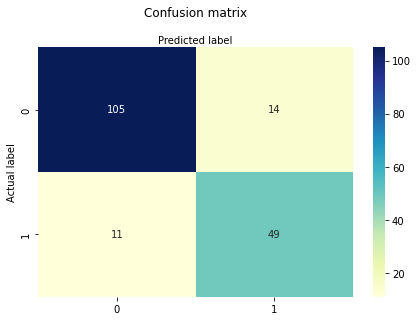

In [10]:
#Visualization
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       119
           1       0.78      0.82      0.80        60

    accuracy                           0.86       179
   macro avg       0.84      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



In [12]:
## Importing the test data
##
##
df_test = pd.read_csv('test.csv')

In [13]:
X = df_test.drop(columns=['PassengerId','Name','Ticket','Parch','SibSp','Cabin','Embarked'],axis = 1)

#Same preprocessing on test set

imp = SimpleImputer(strategy="most_frequent")
X = pd.DataFrame(imp.fit_transform(X))
X.columns = ['Pclass','Sex','Age','Fare']
X['Sex']= X['Sex'].replace({'male': 0})
X['Sex']= X['Sex'].replace({'female': 1})

X = pd.get_dummies(X,columns=['Pclass'])
X[['Age','Fare']] = StandardScaler().fit_transform(X[['Age','Fare']])

In [14]:
preds=model.predict(X)
preds

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': preds})
output.to_csv('submission.csv', index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [15]:
#thank you